<a href="https://colab.research.google.com/github/Rayonil/Interpolating_PBLH/blob/main/Mann_Kendall_PBLH_ERA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calcular e Plotar a tendência da PBLH pelo   teste de Mann-Kendall

## Conectar ao Driver

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


##Importar as Bibliotecas




In [2]:
!pip install netCDF4 -q
!pip install rasterio -q
!pip install pymannkendall -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 41.5 MB/s eta 0:00:00


In [3]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, time, argparse, platform, subprocess
from tqdm import tqdm
import pymannkendall as mk

## **1. Analisar a tendência Anual dos dados de PBLH**


### 1.1. Calcular a Média da PBLH diurna

In [4]:
# Diretório onde estão os arquivos
diretorio_base = '/content/drive/MyDrive/Mapas_Amazonia/PBLH/Anual'

# Dicionário para armazenar os DataFrames de médias
dicionario_de_medias = {}

# Loop para percorrer as pastas que começam com 'PBLH'
for pasta in os.listdir(diretorio_base):
    if pasta.startswith('PBLH'):
        lista_de_arquivos = []

        # Loop para ler os arquivos e criar DataFrames
        for i in range(12, 21):
          # Construindo o nome do arquivo
          nome_arquivo = 'PBLH_{}_hora__{}.txt'.format(i, pasta[-4:])
          # Lendo o arquivo e criando o DataFrame
          df = pd.read_csv('/content/drive/MyDrive/Mapas_Amazonia/PBLH/Anual/{}/{}'.format(pasta, nome_arquivo),
                           delimiter='\t')

          lista_de_arquivos.append(df)
        # Concatenando os DataFrames ao longo das colunas e calculando a média da coluna PBLH
        media_pblh = pd.concat([df['PBLH'] for df in lista_de_arquivos], axis=1).mean(axis=1)

        # Criando um novo DataFrame com a média da coluna PBLH
        df_media_pblh = pd.DataFrame({
            'latitude': lista_de_arquivos[0]['latitude'],  # Supondo que a coluna 'latitude' seja a mesma em todos os dataframes
            'longitude': lista_de_arquivos[0]['longitude'],  # Supondo que a coluna 'longitude' seja a mesma em todos os dataframes
            'PBLH_media': media_pblh
        })
        # Adicionando a média global da pasta ao dicionário
        ano = pasta[-4:]  # Obtendo o ano da pasta
        dicionario_de_medias[f'media_pblh_{ano}'] = df_media_pblh

In [9]:
dicionario_de_medias.keys()

dict_keys(['media_pblh_1980', 'media_pblh_1990', 'media_pblh_2000', 'media_pblh_2010', 'media_pblh_2020', 'media_pblh_1981', 'media_pblh_1982', 'media_pblh_1983', 'media_pblh_1984', 'media_pblh_1985', 'media_pblh_1986', 'media_pblh_1987', 'media_pblh_1988', 'media_pblh_1989', 'media_pblh_1991', 'media_pblh_1992', 'media_pblh_1993', 'media_pblh_1994', 'media_pblh_1995', 'media_pblh_1996', 'media_pblh_1997', 'media_pblh_1998', 'media_pblh_1999', 'media_pblh_2001', 'media_pblh_2002', 'media_pblh_2003', 'media_pblh_2004', 'media_pblh_2007', 'media_pblh_2008', 'media_pblh_2009', 'media_pblh_2005', 'media_pblh_2006', 'media_pblh_2011', 'media_pblh_2012', 'media_pblh_2013', 'media_pblh_2014', 'media_pblh_2015', 'media_pblh_2016', 'media_pblh_2017', 'media_pblh_2018', 'media_pblh_2019'])

##### 1.1.1 Concatenar as médias de PBLH para cada ano

In [8]:
# Ordenar as chaves em ordem crescente
chaves_ordenadas = sorted(dicionario_de_medias.keys())

# Lista para armazenar os dataframes após selecionar a coluna 'PBLH_media'
dataframes_selecionados = []

# Iterar sobre as chaves ordenadas e selecionar a coluna 'PBLH_media' de cada dataframe
for key in chaves_ordenadas:
    dataframe = dicionario_de_medias[key]
    # Certifique-se de que 'PBLH_media' é o nome correto da coluna em cada dataframe
    if 'PBLH_media' in dataframe.columns:
        dataframes_selecionados.append(dataframe['PBLH_media'])

# Concatenar os dataframes ao longo das colunas (axis=1)
pblh_concatenado = pd.concat(dataframes_selecionados, axis=1)

# Mudar os títulos das colunas para os anos correspondentes às chaves do dicionário
pblh_concatenado.columns = [key.split('_')[2] for key in chaves_ordenadas]

In [10]:
pblh_concatenado.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,673.163333,571.748889,630.065556,622.251111,562.846667,625.144444,612.688889,635.094444,585.665556,594.131111,...,564.303333,662.816667,634.830000,677.404444,745.401111,669.737778,729.640000,760.688889,769.364444,739.997778
1,755.287778,623.834444,690.844444,681.483333,609.572222,677.882222,671.568889,699.462222,623.014444,647.758889,...,603.184444,732.426667,706.597778,761.070000,839.606667,768.991111,812.593333,850.084444,876.317778,832.873333
2,752.400000,624.933333,674.810000,676.667778,615.034444,672.406667,666.885556,696.107778,627.982222,646.495556,...,607.721111,732.956667,716.661111,758.591111,830.833333,776.248889,793.732222,835.292222,857.565556,828.358889
3,699.195556,602.607778,651.996667,660.608889,607.452222,651.921111,636.267778,670.918889,619.202222,621.968889,...,599.787778,713.813333,698.343333,734.245556,790.824444,732.635556,741.226667,787.346667,791.821111,747.372222
4,723.978889,597.917778,657.012222,664.088889,596.140000,660.127778,633.598889,662.902222,607.171111,623.184444,...,599.434444,754.257778,724.893333,755.596667,836.324444,808.428889,770.337778,822.335556,818.578889,791.595556


### 1.2. Aplicar o Teste de Mann-Kendall

In [11]:
# Lista para armazenar os resultados do Teste de Mann-Kendall
resultados_mannkendall = []
# Loop através das linhas do dataframe pblh_concatenado
for index, row in pblh_concatenado.iterrows():
    # Calcular o Teste de Mann-Kendall para cada linha
    resultado = mk.original_test(row)

    # Adicionar o resultado à lista de resultados
    resultados_mannkendall.append(resultado)

In [12]:
# Criar um novo dataframe com os resultados do Teste de Mann-Kendall
df_resultados_mannkendall = pd.DataFrame(resultados_mannkendall, columns=['Tendência', 'H0', 'P-Valor', 'Z', 'Tau', 'S', 'Var_S', 'Inclinação', 'Intercept'])

# Adicionar índices ao novo dataframe
df_resultados_mannkendall.index = pblh_concatenado.index

# Adicionar as colunas latitude e longitude à df_resultados_mannkendall nas posições 0 e 1
df_resultados_mannkendall.insert(0, 'latitude', dicionario_de_medias[key]['latitude'])
df_resultados_mannkendall.insert(1, 'longitude', dicionario_de_medias[key]['longitude'])

In [13]:
# Calcular a altura prevista pela linha de tendência para o dataframe df_resultados_mannkendall
df_resultados_mannkendall['trend_line'] = df_resultados_mannkendall['Inclinação'] * 40 + df_resultados_mannkendall['Intercept']

# Calcular os resíduos (diferença entre a altura real e a altura prevista)
df_resultados_mannkendall['Dif_linear_trends'] =  df_resultados_mannkendall['trend_line'] - pblh_concatenado.mean(axis=1)

# Testar a significância ao nível de confiança de 95%
nivel_confianca = 0.05
df_resultados_mannkendall['tendencia_significativa']= df_resultados_mannkendall['P-Valor'] < nivel_confianca

In [14]:
df_resultados_mannkendall.head()

,latitude,longitude,Tendência,H0,P-Valor,Z,Tau,S,Var_S,Inclinação,Intercept,trend_line,Dif_linear_trends,tendencia_significativa
0,7.00,-75.0,increasing,True,0.001266,3.223566,0.351220,288.0,7926.666667,2.309857,578.960635,671.354921,31.235517,True
1,6.75,-75.0,increasing,True,0.001480,3.178638,0.346341,284.0,7926.666667,3.182960,629.290801,756.609199,49.540744,True
2,6.50,-75.0,increasing,True,0.000262,3.650380,0.397561,326.0,7926.666667,3.389756,626.824889,762.415111,56.344759,True
3,6.25,-75.0,increasing,True,0.000061,4.009802,0.436585,358.0,7926.666667,2.819137,614.536151,727.301627,48.041031,True
4,6.00,-75.0,increasing,True,0.000038,4.122121,0.448780,368.0,7926.666667,3.840497,593.354499,746.974390,56.211409,True


### 1.3. Plotar a tendência da PBLH espacializada para a Amazônia

In [15]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Lendo o shapefile da Amazônia
amazonia_shapefile = "/content/drive/MyDrive/Mapas_Amazonia/Shape_AM/Bioma_Amazonico.shp"  # Substitua pelo caminho real para o seu shapefile
amazonia = gpd.read_file(amazonia_shapefile)


# Criando uma lista de objetos Point com base nas latitudes e longitudes
geometry = [Point(lon, lat) for lon, lat in zip(df_resultados_mannkendall['longitude'], df_resultados_mannkendall['latitude'])]

# Criando um GeoDataFrame a partir dos pontos
gdf_pontos = gpd.GeoDataFrame(df_resultados_mannkendall, geometry=geometry, crs=amazonia.crs)

# Filtrando apenas os pontos que estão dentro do shape da Amazônia
pontos_amazonia = gdf_pontos[gdf_pontos.within(amazonia.geometry.unary_union)]

In [16]:
from shapely.geometry import Polygon
from scipy.interpolate import griddata
# Resolução da grade
resolucao = 0.1

# Calculando os limites da grade a partir dos limites da Amazônia
xmin, ymin, xmax, ymax = amazonia.total_bounds
xgrid = np.arange(xmin, xmax, resolucao)
ygrid = np.arange(ymin, ymax, resolucao)
xgrid, ygrid = np.meshgrid(xgrid, ygrid)

# Criando polígonos a partir dos pontos interpolados
poligonos_interpolados = [Polygon([(x, y), (x + resolucao, y), (x + resolucao, y + resolucao), (x, y + resolucao)])
                          for x, y in zip(xgrid.flat, ygrid.flat)]

# Criando um GeoDataFrame com os polígonos interpolados
gdf_interpolado = gpd.GeoDataFrame(geometry=poligonos_interpolados, crs=amazonia.crs)

# Interpolando os valores de PBLH para os polígonos
gdf_interpolado['Dif_linear_trends'] = griddata((pontos_amazonia['longitude'], pontos_amazonia['latitude']),
                                   pontos_amazonia['Dif_linear_trends'], (xgrid, ygrid), method='cubic').flatten()

# Fazendo a interseção com o shapefile da Amazônia
resultado_final = gpd.overlay(gdf_interpolado, amazonia, how='intersection')


In [17]:
# Filtrar os Pontos Significativos:
pontos_significativos = df_resultados_mannkendall[df_resultados_mannkendall['H0'] == True]

# Criar um GeoDataFrame para os Pontos Significativos:
geometry_significativo = [Point(lon, lat) for lon, lat in zip(pontos_significativos['longitude'], pontos_significativos['latitude'])]
gdf_pontos_significativos = gpd.GeoDataFrame(pontos_significativos, geometry=geometry_significativo, crs=amazonia.crs)

## Fazendo a interseção com o shapefile da Amazônia
gdf_pontos_significativos_final = gpd.overlay(gdf_pontos_significativos, amazonia, how='intersection')

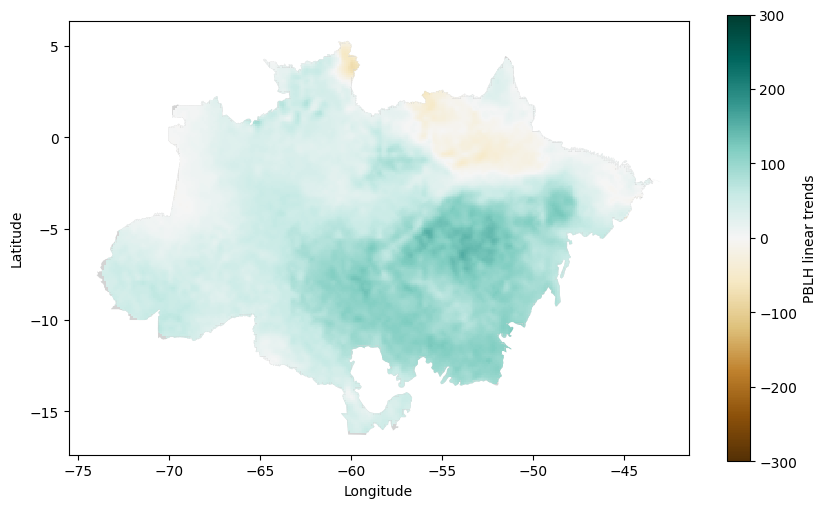

In [18]:
# Criando o mapa com base no GeoDataFrame resultante
fig, ax = plt.subplots(figsize=(10, 10))
amazonia.plot(ax=ax, color='lightgrey')  # Plotando o contorno da Amazônia em cinza claro



# Plotando o PBLH interpolado dentro dos limites da Amazônia
resultado_final.plot(column='Dif_linear_trends', cmap='BrBG', ax=ax,  vmin=-300, vmax=300)
# Plotando os pontos significativos
#gdf_pontos_significativos_final.plot(ax=ax, color='grey', markersize=1, label='Significant Points')

plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Adicionando a barra de cores manualmente
sm = plt.cm.ScalarMappable(cmap='BrBG', norm=plt.Normalize(vmin=-300, vmax=300))
sm._A = []  # Criando uma lista vazia para armazenar os valores da barra de cores
cbar = plt.colorbar(sm, ax=ax, shrink=0.58)
cbar.set_label('PBLH linear trends')
# Definir a pasta de saída
saida = r'/content/drive/MyDrive/'
# Criar uma nova pasta Plots usando a função os.makedirs()
sub_dir = os.path.join(saida, 'Plot_PBLH/')
arquivo = 'PBLH_Mann-Kendall'
if not os.path.exists(sub_dir):
  os.makedirs(sub_dir)
plt.savefig(sub_dir + arquivo , dpi=400)
plt.show()